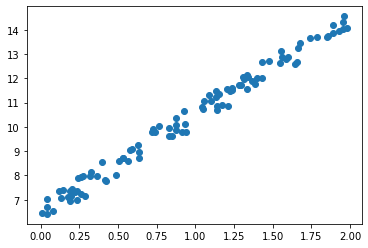

In [1]:
#데이터 세트 만들기
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
#y=4x+6을 근사, 임의의 값은 노이즈를 위해 만든다.
X = 2*np.random.rand(100,1)
y = 6 + 4*X + np.random.rand(100,1)

#X, y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

In [2]:
#비용 함수 정의
#실제 y값과 예측된 y값을 인자로 받아서 비용 함수 계산
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [3]:
#w1과 w0를 업데이트 할 w1_update, w0_update 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    #먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    #예측 배열을 계산하고 예측과 실제값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    #w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))
    #w1과 w0를 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [5]:
#get_weight_updates()를 경사 하강 방식으로 반복적으로 수행하여 w1과 w0를 업데이트하는 함수인 gradient_descent_steps()함수 생성
def gradient_descent_steps(X,y,iters=10000):
    #w0, w1 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    #인지로 주어진 iters만큼 반복적으로 get_weight_updates()를 호출해 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0

In [6]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print('w1:', w1[0,0], 'w0:', w0[0,0])
y_pred = w1[0,0]*X + w0
print('Gradient Descent Total Cost:', get_cost(y, y_pred))

w1: 4.028260257450866 w0: 6.49047862852975
Gradient Descent Total Cost: 0.07754792006806614


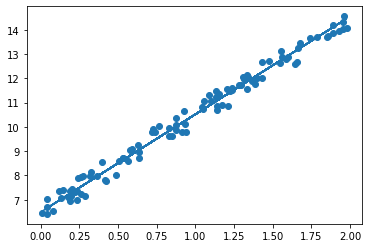

In [7]:
plt.scatter(X,y)
plt.plot(X,y_pred)

In [8]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iters_index=0
    
    for ind in range(iters):
        np.random.seed(ind)
        #전체 X,y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        #랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1-w1_update
        w0 = w0-w0_update
    
    return w1, w0


In [9]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print('w1:', round(w1[0,0],3), 'w0:', round(w0[0,0],3))
y_pred = w1[0,0]*X +w0
print('Stochastic Gradient Descent Total Cost:', get_cost(y, y_pred))

w1: 4.031 w0: 6.486
Stochastic Gradient Descent Total Cost: 0.07771709870768694


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston

#boston 데이터 세트 로드
boston = load_boston()
#boston 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

#boston 데이터 세트의 target 배열을 주택 가격, 이를 price 칼럼으로 dataframe에 추가
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트의 크기', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트의 크기 (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


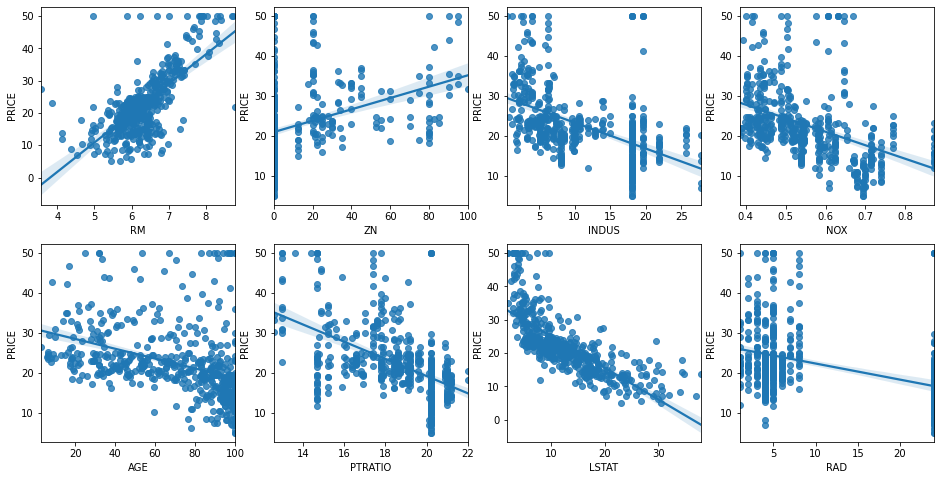

In [11]:
#2개의 행과 4개의 열을 가진 subplots 이용, axs는 4*2개의 ax를 가진다.
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    #seaborn의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=123)
#선형 회귀 OLS로 학습, 예측, 평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE:', mse, 'RMSE:', rmse)
print('Variance Score:', r2_score(y_test, y_preds))
print('절편 값:', lr.intercept_)
print('회귀 계수 값:', np.round(lr.coef_,1))

MSE: 28.405854810508202 RMSE: 5.329714327288865
Variance Score: 0.6485645742370708
절편 값: 28.981270388095616
회귀 계수 값: [ -0.1   0.    0.1   0.3 -14.3   4.8  -0.   -1.3   0.3  -0.   -1.    0.
  -0.5]


In [14]:
#회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성, 인덱스 칼럼명 주의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          4.8
RAD         0.3
CHAS        0.3
INDUS       0.1
B           0.0
TAX        -0.0
AGE        -0.0
ZN          0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -1.0
DIS        -1.3
NOX       -14.3
dtype: float64

In [16]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

#cross_val_score()으로 폴드 5 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE를 구한다.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

#cross_val_score(scoring='neg_mean_squared_error')로 반환된 값을 모두 음수
print('5 folds의 개별 negative MSE score:', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE:', np.round(rmse_scores,2))
print('5 folds의 평균 RMSE:', np.round(avg_rmse,2))

5 folds의 개별 negative MSE score: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE: 5.83


In [17]:
#단항값을 2차 다항값으로 변환하기
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#다항식으로 변환한 단항식 생성, [[0,1], [2,3]]의 2*2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

#degree=2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [18]:
#3차 다항 회귀의 결정 함수식
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature \n:', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature 
: [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [19]:
#3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature \n:', poly_ftr)

#Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값(y)으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀계수\n:', np.round(model.coef_, 2))
print('Polynomial 회귀 shape:', model.coef_.shape)

3차 다항식 계수 feature 
: [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀계수
: [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 shape: (10,)


In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
    return y

#Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)
model = model.fit(X,y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
#Pipeline 사용하지 않고 전처리 및 모델 fitting
#우리가 할 전처리는 PolynomialFeatures
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
y_target = bostonDF['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=123)

#PolynomialFeatures 전처리
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
#선형 회귀 OLS로 학습, 예측, 평가 수행
lr = LinearRegression()
lr.fit(X_poly, y_train)
preds = lr.predict(X_test_poly)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)

print('MSE:', mse, 'RMSE:', rmse)
print('Variance Score:', r2_score(y_test, preds))
print('절편 값:', lr.intercept_)
print('회귀 계수 값:', np.round(lr.coef_,1))

MSE: 18.87140932513203 RMSE: 4.344123539349685
Variance Score: 0.7665241262702337
절편 값: -18.501359320524184
회귀 계수 값: [ -6.6  -0.   -2.7   0.2 -37.3  14.4   0.9  -5.7   3.7  -0.1  -0.6   0.
   0.7  -0.    0.4   0.6   0.9  -1.4   0.2   0.   -0.1   0.6  -0.    0.7
  -0.    0.   -0.   -0.   -0.1  -0.7   0.   -0.   -0.   -0.    0.   -0.
   0.   -0.    0.   -0.3   2.2   0.2   0.    0.1  -0.   -0.   -0.1   0.
  -0.    0.2 -28.3  -3.1  -0.1   0.4  -0.7   0.1  -0.9   0.1   0.3 -11.1
  10.   -0.3  16.1  -3.4   0.2  -8.3   0.    1.    0.4  -0.1  -0.   -0.2
  -0.   -0.1  -0.   -0.3  -0.   -0.    0.   -0.   -0.   -0.   -0.    0.4
  -0.2  -0.   -0.1  -0.    0.1  -0.2   0.    0.   -0.   -0.1  -0.    0.
   0.    0.    0.    0.    0.   -0.   -0.    0. ]


In [38]:
#Pipeline 사용하기
from sklearn.pipeline import Pipeline
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
y_target = bostonDF['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=123)

poly = PolynomialFeatures(degree=2, include_bias=False)
model = LinearRegression()
pipe = Pipeline([('my_poly', poly),
                 ('my_model', model)]) #첫번째 객체는 fit_transform()가능 객체, 마지막 객체는 predict 가능 객체
pipe.fit(X_train, y_train)
print('테스트 평가:', pipe.score(X_test, y_test))

테스트 평가: 0.7665241262702337


In [50]:
#linear regression은 파라미터가 없으니까 릿지 회귀로 모델 변경
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold, GridSearchCV

X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
y_target = bostonDF['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=123)

poly = PolynomialFeatures(degree=2, include_bias=False)
model = Ridge(random_state=123)
pipe = Pipeline([('my_poly', poly),
                 ('my_model', model)])

###GridSearchCV 코드
#pipe에서 지정한 모델 이름 뒤에 언더바 두개 + 파라미터명
kfold = KFold(n_splits=3, shuffle=True, random_state=123)
param_grids = {'my_model__alpha':[0.1,1,10],
             'my_model__max_iter':[100, 1000, 2000]
             }

grid = GridSearchCV(estimator=pipe,
                   param_grid=param_grids,
                   cv=kfold,
                   n_jobs=-1,
                    iid=True,
                   scoring='neg_mean_squared_error').fit(X_train, y_train)

mse = -1*grid.score(X_test, y_test)
rmse = np.sqrt(mse)

print('최적의 하이퍼 파라미터:', grid.best_params_)
print('RMSE:', rmse)

최적의 하이퍼 파라미터: {'my_model__alpha': 10, 'my_model__max_iter': 100}
RMSE: 4.134716956578526


C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


In [48]:
model.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [51]:
pipe.named_steps

{'my_poly': PolynomialFeatures(include_bias=False),
 'my_model': Ridge(random_state=123)}

In [53]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

#alpha=10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 negative MSE scores:', np.round(neg_mse_scores,3))
print('5 folds의 개별 RMSE scores', np.round(rmse_scores,3))
print('5 folds의 평균 RMSE', np.round(avg_rmse,3))

5 folds의 개별 negative MSE scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE 5.518


In [58]:
#릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse 구하기
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    #cross_val_score 이용해 5 폴드의 평균 rmse 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha ', alpha, '일 때 5 folds의 평균 RMSE', np.round(avg_rmse,3))

alpha  0 일 때 5 folds의 평균 RMSE 5.829
alpha  0.1 일 때 5 folds의 평균 RMSE 5.788
alpha  1 일 때 5 folds의 평균 RMSE 5.653
alpha  10 일 때 5 folds의 평균 RMSE 5.518
alpha  100 일 때 5 folds의 평균 RMSE 5.33


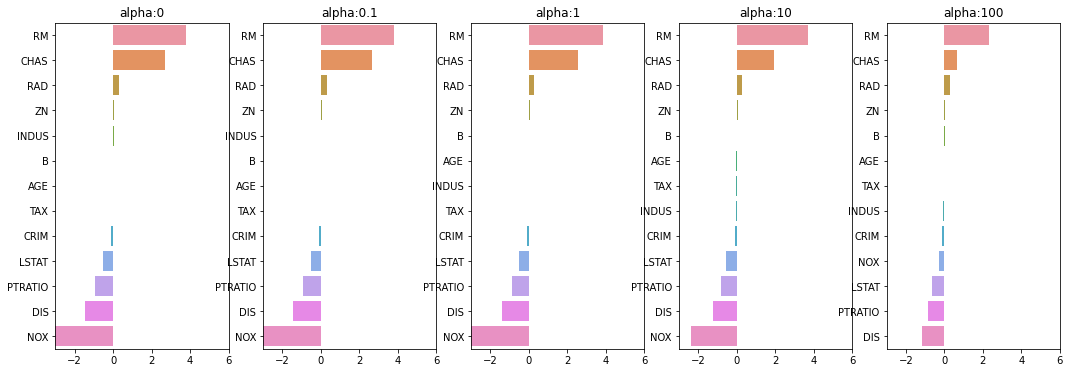

In [59]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [60]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


In [63]:
from sklearn.linear_model import Lasso

#alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('########', model_name, '#######')
    for param in params:
        if model_name == 'Ridge' : model = Ridge(alpha=param)
        elif model_name == 'Lasso' : model = Lasso(alpha=param)
        elif model_name == 'ElasticNet' : model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha', param, '일 때 5 폴드 세트의 평균 rmse:', np.round(avg_rmse,3))
        
        #cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            #alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname = 'alpha:'+str(param)
            coeff_df[colname] = coeff
    return coeff_df


In [64]:
#라쏘에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

######## Lasso #######
alpha 0.07 일 때 5 폴드 세트의 평균 rmse: 5.612
alpha 0.1 일 때 5 폴드 세트의 평균 rmse: 5.615
alpha 0.5 일 때 5 폴드 세트의 평균 rmse: 5.669
alpha 1 일 때 5 폴드 세트의 평균 rmse: 5.776
alpha 3 일 때 5 폴드 세트의 평균 rmse: 6.189


In [65]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [67]:
#엘라스틱넷에 사용될 alpha 파라미터 값들을 정의하고 get_linear_reg_eval()함수 호출
#l1_ratio는 0.7로 고정(alpha값의 변화만 살피기 위함)
from sklearn.linear_model import ElasticNet
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

######## ElasticNet #######
alpha 0.07 일 때 5 폴드 세트의 평균 rmse: 5.542
alpha 0.1 일 때 5 폴드 세트의 평균 rmse: 5.526
alpha 0.5 일 때 5 폴드 세트의 평균 rmse: 5.467
alpha 1 일 때 5 폴드 세트의 평균 rmse: 5.597
alpha 3 일 때 5 폴드 세트의 평균 rmse: 6.068


In [68]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()
#StandardScaler()로 평균이 0, 분산이 1인 데이터 분포로 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=123)

In [3]:
from sklearn.metrics import accuracy_score, roc_auc_score

#로지스틱 회귀를 이용해 학습 및 예측 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

#정확도와 roc_auc 측정
print('accuracy:', accuracy_score(y_test, lr_preds))
print('roc_auc:', roc_auc_score(y_test, lr_preds))

accuracy: 0.9941520467836257
roc_auc: 0.9926470588235294


In [4]:
from sklearn.model_selection import GridSearchCV

params = {'penalty':['l2', 'l1'],
         'C':[0.01, 0.1, 1, 1.5, 5, 10]}
grid_clf = GridSearchCV(lr_clf, param_grid = params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:', grid_clf.best_params_, '최적 평균 정확도:', grid_clf.best_score_)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_valida

최적 하이퍼 파라미터: {'C': 1, 'penalty': 'l2'} 최적 평균 정확도: 0.975392184164114


C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


In [5]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

rf = RandomForestRegressor(random_state=123, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 교차 검증의 개별 Negative MSE scores:', np.round(neg_mse_scores, 3))
print('5 교차 검증의 개별 RMSE scores:', np.round(rmse_scores, 3))
print('5 교차 검증의 평균 RMSE:', np.round(avg_rmse, 3))

5 교차 검증의 개별 Negative MSE scores: [ -7.89  -12.854 -20.058 -46.339 -18.594]
5 교차 검증의 개별 RMSE scores: [2.809 3.585 4.479 6.807 4.312]
5 교차 검증의 평균 RMSE: 4.398


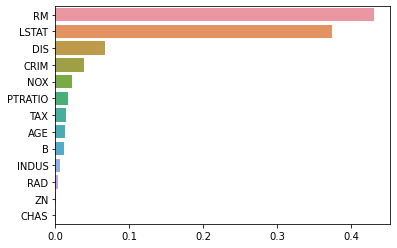

In [6]:
import seaborn as sns

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_data, y_target)
feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

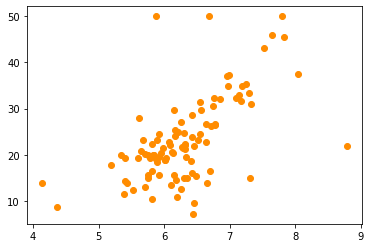

In [7]:
bostonDF_sample = bostonDF[['RM', 'PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=123)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

lr_reg = LinearRegression()
dt_reg2 = DecisionTreeRegressor(max_depth=2)
dt_reg7 = DecisionTreeRegressor(max_depth=7)

#실제 예측을 적용할 테스트용 데이터 세트 만들기
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1,1)

X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

lr_reg.fit(X_feature, y_target)
dt_reg2.fit(X_feature, y_target)
dt_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_dt2 = dt_reg2.predict(X_test)
pred_dt7 = dt_reg7.predict(X_test)

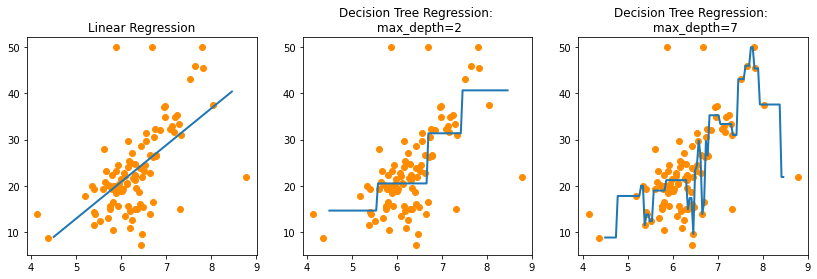

In [10]:
fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선 
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr,label="linear", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선 
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_dt2, label="max_depth:2", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선 
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_dt7, label="max_depth:7", linewidth=2)

In [23]:
#스태킹 앙상블
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

#개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    #지정된 n_folds 값으로 KFold 생성
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=123)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0],1))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__, 'model 시작')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습, 예측할 폴드 데이터 세트 추출
        print('폴드 세트:', folder_counter, '시작')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행
        model.fit(X_tr, y_tr)
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트 내 학습된 기반 모델에서 예측 후 데이터 저장
        test_pred[:,folder_counter] = model.predict(X_test_n)
        
    #폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred, test_pred_mean

In [21]:
#보스턴 집값
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.2, random_state=123)

X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
ridge_reg = Ridge(alpha=8)
lasso_reg = Lasso(alpha=0.001)
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05)
#각 개별 기반(base) 모델이 생성한 학습용, 테스트용 데이터 반환
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Ridge model 시작
폴드 세트: 0 시작
폴드 세트: 1 시작
폴드 세트: 2 시작
폴드 세트: 3 시작
폴드 세트: 4 시작
Lasso model 시작
폴드 세트: 0 시작
폴드 세트: 1 시작
폴드 세트: 2 시작
폴드 세트: 3 시작
폴드 세트: 4 시작
XGBRegressor model 시작
폴드 세트: 0 시작
폴드 세트: 1 시작
폴드 세트: 2 시작
폴드 세트: 3 시작
폴드 세트: 4 시작
LGBMRegressor model 시작
폴드 세트: 0 시작
폴드 세트: 1 시작
폴드 세트: 2 시작
폴드 세트: 3 시작
폴드 세트: 4 시작


In [24]:
#개별 모델이 반환한 학습 및 테스트용 데이터 세트를 스태킹 형태로 결합
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test), axis=1)

#최종 메타 모델은 라쏘 모델 적용
meta_model_lasso = Lasso(alpha=0.0005)

#개별 모델 예측값을 기반으로 새롭게 만들어진 학습, 테스트 데이터로 메타 모델 예측 및 RMSE 측정
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 3.961432796069961
